<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [75]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

#### Read the dataset in the csv file from the URL


In [76]:
from js import fetch
import io
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt


URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [77]:
boston_df=pd.read_csv(boston_url)

#### Task 2 (1):  For the "Median value of owner-occupied homes" provide a boxplot



In [78]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


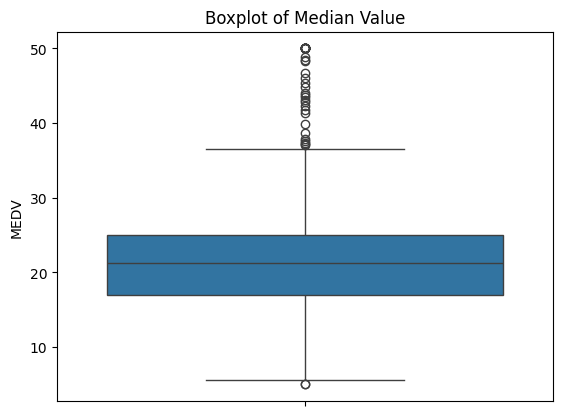

In [79]:
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value')
plt.ylabel('MEDV')
plt.show()

#### Task 2 (2):  Provide a  bar plot for the Charles river variable

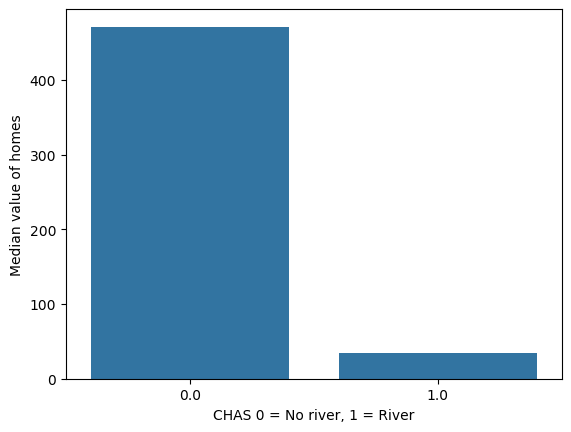

In [90]:
sns.countplot(x="CHAS", data=boston_df)
plt.xlabel('CHAS 0 = No river, 1 = River')
plt.ylabel('Median value of homes')
plt.show()

#### Task 2 (3):  Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


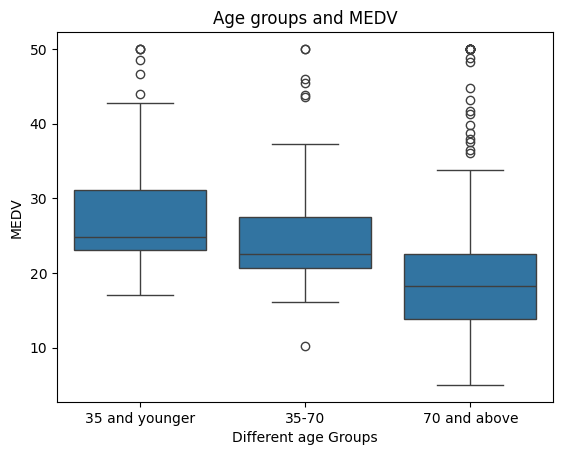

In [91]:
ages = [0, 35, 70, 100] 
labels = ['35 and younger', '35-70', '70 and above']
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=ages, labels=labels)

sns.boxplot(x='age_group', y='MEDV', data=boston_df)

plt.title('Age groups and MEDV')
plt.xlabel('Different age Groups')
plt.ylabel('MEDV')
plt.show()

#### Task 2 (4)  Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?





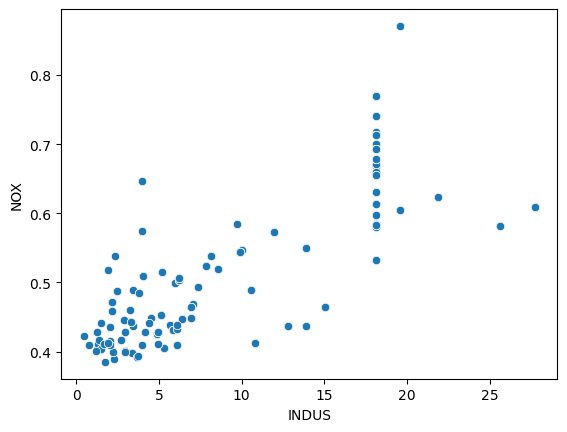

In [92]:
sns.scatterplot(data=boston_df, y='NOX', x='INDUS')
plt.show()

There is a strongly positive relationship between the number of non-retail businesses and nitric oxide concentrations. 

#### Task 2 (5): Create a histogram for the pupil to teacher ratio variable

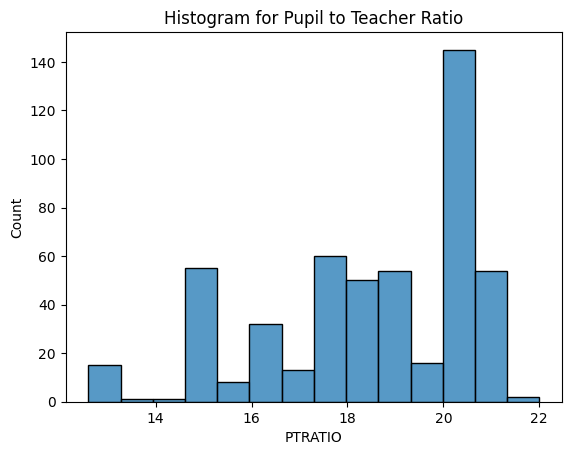

In [99]:
sns.histplot(data=boston_df, x="PTRATIO")
plt.title('Histogram for Pupil to Teacher Ratio')
plt.show()

#### Task 3 (1): Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null hypothesis: There is no significant difference in median value of houses bounded by the Charles river

In [84]:
from scipy.stats import ttest_ind

In [85]:
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_value = ttest_ind(chas_0, chas_1)
print(t_stat)
print(p_value)

-3.996437466090509
7.390623170519905e-05


There is a significant difference between the two, so the null hypothesis can be rejected.

#### Task 3 (2): Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)



Null hypothesis: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [86]:
from scipy.stats import f_oneway
import pandas as pd

In [87]:
proportions = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 
labels = ['0-10','10-20','21-30','31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
boston_df['AGE_groups'] = pd.cut(boston_df['AGE'], bins=proportions, labels=labels)
groups = [group['MEDV'].values for name, group in boston_df.groupby('AGE_groups')]
anova = f_oneway(*groups)
print("F-value:", anova.statistic)
print("P-value:", anova.pvalue)

<ipython-input-87-afc47b09d9ae>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['MEDV'].values for name, group in boston_df.groupby('AGE_groups')]


F-value: 9.945113084895004
P-value: 4.363387106534668e-14


P value is <0.5 so we can reject the null hypothesis. There is a significant difference in median values of houses for each proportion of units built prior to 1940. 

#### Task 3 (3): Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [96]:
from scipy.stats import pearsonr


indus = boston_df["INDUS"].values
nox = boston_df["NOX"].values

correlation, p_value = pearsonr(indus, nox)

print(correlation)
print(p_value)

0.7636514469209192
7.913361061210442e-98


The correlation coefficient shows a strong positive relationship. The P value is <0.5, so the correlation is statistically significant. Therefore we cannot conlcude that there is no relationship. 

#### Task 3 (4): What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null hypothesis: there is no impact of weight on the median value of homes.

In [89]:
from scipy.stats import linregress

distance = boston_df["DIS"].values
medv = boston_df["MEDV"].values

slope, intercept, r_value, p_value, std_error = linregress(distance, medv)

print(slope)
print(r_value)
print(p_value)
print(std_error)

1.0916130158411097
0.2499287340859039
1.2066117273371223e-08
0.18837841478683107


There is a slight increase in MEDV for every unit increase in distance. The R value represents the Pearson coefficient, which in this case shows a weak positive relationship. The P value is less than 0.5, so the relationship is statistically significant. There is a standard error of 0.1884, showing that the slope is quite precise. The null hypothesis is rejected. 